# Crop raster data with rioxarray and geopandas

Lesson 7: https://carpentries-incubator.github.io/geospatial-python/08-crop-raster-data/index.html

In [1]:
import pystac
import rioxarray

In [19]:
items = pystac.ItemCollection.from_file("search.json")
raster = rioxarray.open_rasterio(items[1].assets["visual"].href,overview_level=3)  #selecting a true color image
print(raster.shape)

(3, 687, 687)


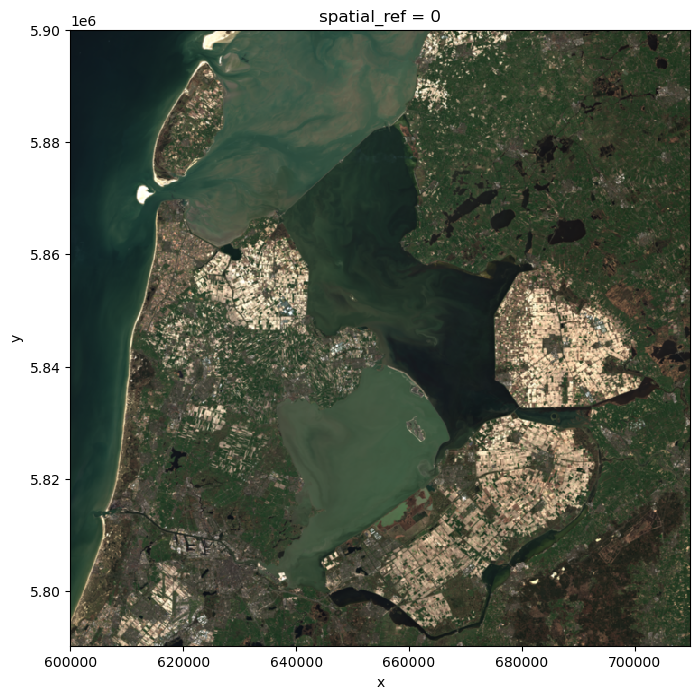

In [20]:
# Visualize it
raster.plot.imshow(figsize=(8,8))

In [21]:
import geopandas as gpd #pandas for geospatial stuff
xmin, xmax = (120_000, 135_000)
ymin, ymax = (485_000, 500_000)
bbox = (xmin,ymin,xmax,ymax)
fields = gpd.read_file("../data/brpgewaspercelen_definitief_2020_small.gpkg",bbox = bbox)
fields_cx = fields.cx[xmin:xmax, ymin:ymax] #index, cx changes meaning of square brackets otherwise fields['geometry']

In [23]:
fields = fields_cx.to_crs(raster.rio.crs) 
fields.crs

<Projected CRS: EPSG:32631>
Name: WGS 84 / UTM zone 31N
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: UTM zone 31N
- method: Transverse Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [24]:
fields.total_bounds

array([ 626758.92477826, 5801978.3252512 ,  642583.33625691,
       5817705.26052954])

In [26]:
raster_clip_box = raster.rio.clip_box(*fields.total_bounds)  #* to unpack the arguments in total bounds

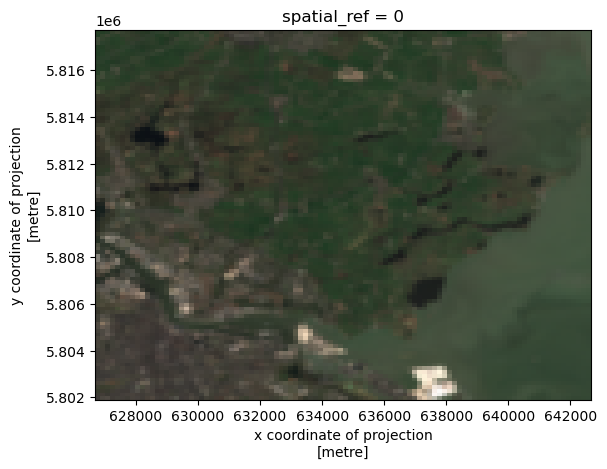

In [27]:
raster_clip_box.plot.imshow()

In [31]:
#Convert to lat/long by " .to_crs(epsg=4326)" where 4326 is lat/long
fields_latlong = fields_cx.to_crs(epsg=4326) 

<Axes: >

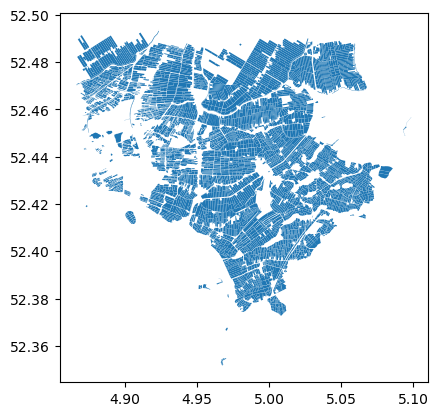

In [32]:
fields_latlong.plot()